In [9]:
using DifferentialEquations
using Plots

In [52]:
function pend_doble(du, u, p, t)
    q1, q2, q̇1, q̇2 = u
    
    m1, m2 = 0.2, 0.3
    J1, J2 = 0.001, 0.0005
    l1, l2 = 0.2, 0.15
    μ1, μ2 = m2*l2^2, m2*l1*l2
    
    g = 9.81
    
    τ = [0;0]
    q = [q1;q2]
    q̇ = [q̇1;q̇2]
    
    M = [m1*l1^2+m2*l1^2+μ1+2*μ2*cos(q2)+J1+J2 μ1+μ2*cos(q2)+J2;μ1+μ2*cos(q2)+J2 μ1+J2]
    C = -μ2*sin(q2)*[2*q2 q2;q1 0]
    G = g*[m1*l1*cos(q1)+m2*l1*cos(q1)+m2*l2*cos(q1+q2);m2*l2*cos(q1+q2)]
    
    q̈ = inv(M)*(τ - C*q̇ - G)
    du[1] = q̇[1]
    du[2] = q̇[2]
    du[3] = q̈[1]
    du[4] = q̈[2]
end

pend_doble (generic function with 1 method)

In [57]:
u0 = [1.0; 0.0; 1.0; 0.0]
tspan = (0.0, 10.0)
prob = ODEProblem(pend_doble, u0, tspan)
sol = solve(prob);

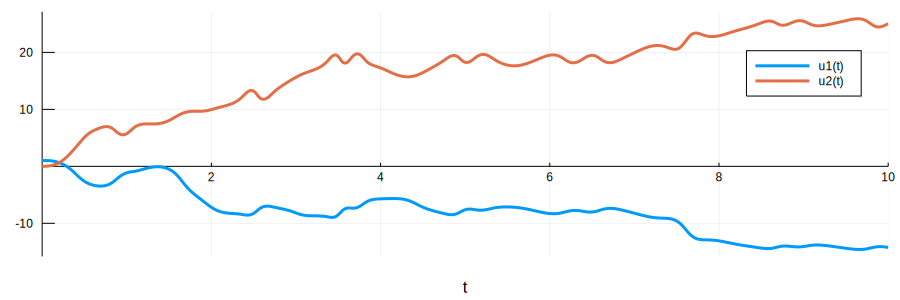

In [63]:
plot(sol, vars=[(0, 1), (0, 2)], size = (900,300), frame_style=:origin)

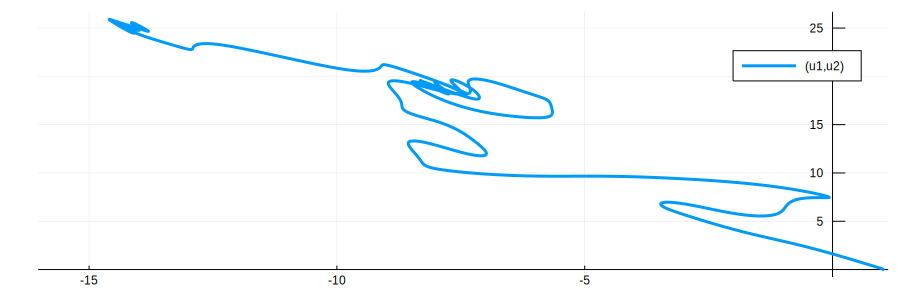

In [64]:
plot(sol,vars=(1,2), size = (900,300), frame_style=:origin)